In [66]:
#@title Imports

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math
import random

# example of defining the discriminator model
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LeakyReLU
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Lambda
from tensorflow.nn import local_response_normalization
from keras.utils.vis_utils import plot_model

from keras.layers.merge import concatenate
from keras.models import Model
from tensorflow.keras import layers

In [34]:
def getGraspQualityModel():
    model = tf.keras.Sequential()    

    model.add(Conv2D(filters=64, kernel_size=7, activation='relu', input_shape=(32,32,1)))
    model.add(Conv2D(filters=64, kernel_size=5, activation='relu'))
    
    model.add(Lambda(local_response_normalization))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
    
    
    model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
    model.add(Lambda(local_response_normalization))

    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))

    plot_model(model, to_file='GraspQualityModel_plot.png', show_shapes=True, show_layer_names=True)
    return model
    
getGraspQualityModel()


In [40]:
def getPointcloudModel():
    model = Sequential()
    model.add(Dense(16, input_dim=1, activation='relu'))
    return model

In [68]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.utils import plot_model

def getDexnet2Model():
    grasp_model = getGraspQualityModel()
    pc_model = getPointcloudModel()

    out = Dense(1024, activation='relu')

    x = layers.concatenate([grasp_model, pc_model])

    # merged = Model(inputs=[grasp_model,pc_model],outputs=[out])
    # pc_model.summary()
    # merge = concatenate([grasp_model, pc_model])
    # # interpretation layer
    # hidden1 = Dense(1024, activation='relu')(merge)
    # # prediction output
    # output = Dense(2, activation='softmax')(hidden1)
    # model = Model(inputs=[(32,32,1),(1)], outputs=output)
    # # summarize layers
    # print(model.summary())
    # plot_model(model, to_file='Dexnet2Model_plot.png', show_shapes=True, show_layer_names=True)
    # return model

getDexnet2Model()

TypeError: 'NoneType' object is not subscriptable

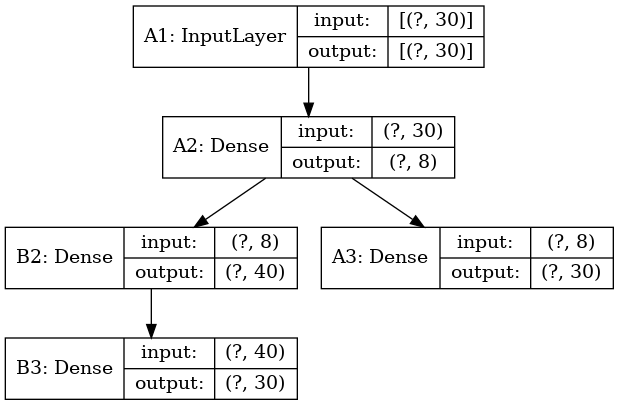

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.utils import plot_model

A1 = Input(shape=(30,),name='A1')
A2 = Dense(8, activation='relu',name='A2')(A1)
A3 = Dense(30, activation='relu',name='A3')(A2)

B2 = Dense(40, activation='relu',name='B2')(A2)
B3 = Dense(30, activation='relu',name='B3')(B2)

merged = Model(inputs=[A1],outputs=[A3,B3])
plot_model(merged,to_file='demo.png',show_shapes=True)
